# Neural Network

In [62]:
# Page 278
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

In [6]:
iris = load_iris()
X = iris.data[:, (2, 3)] # Petal length, petal width
y = (iris.target == 0).astype(int) #Iris setosa?

per_clf = Perceptron()
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])

## Tensorflow

In [23]:
import tensorflow as tf
from tensorflow import keras

In [24]:
tf.__version__

'2.8.0'

In [22]:
keras.__version__

'2.8.0'

# Using Keras to Load the Dataset

In [27]:
fashon_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashon_mnist.load_data()

In [28]:
X_train_full.shape

(60000, 28, 28)

In [32]:
X_train_full.dtype

dtype('uint8')

In [30]:
y_train_full.shape

(60000,)

In [33]:
y_train_full.dtype

dtype('uint8')

In [35]:
X_valid, X_train = X_train_full[:5000]/ 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [36]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [37]:
class_names[y_train[0]]

'Coat'

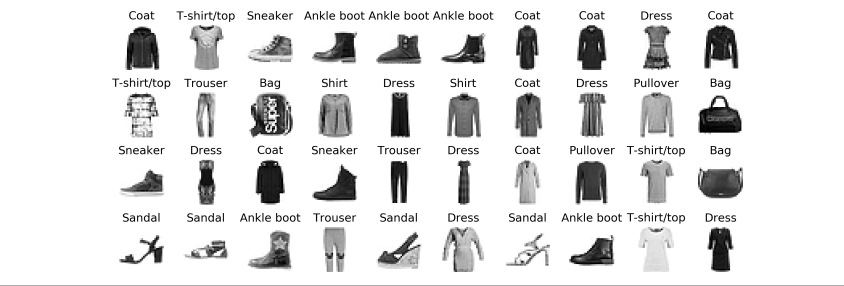

## Creating the Model Using the Sequential API


In [38]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [40]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")

])

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.layers

In [45]:
model.layers[1].name

'dense_3'

In [47]:
model.get_layer('dense_3').name

'dense_3'

In [50]:
hidden1 = model.layers[1]

In [51]:
hidden1.name

'dense_3'

In [52]:
weights, biases = hidden1.get_weights()

In [53]:
weights

array([[ 0.00326654,  0.04915849,  0.05397195, ..., -0.03521258,
         0.02732454, -0.02789604],
       [ 0.07178321,  0.00523987,  0.00304829, ..., -0.01919819,
        -0.04939348, -0.05387196],
       [ 0.0649453 , -0.0709402 ,  0.04834662, ..., -0.02116413,
         0.05631968, -0.03541079],
       ...,
       [-0.01493022, -0.01247551,  0.01373868, ..., -0.01519164,
         0.02845754, -0.04945278],
       [-0.02284059,  0.02715003, -0.07014692, ..., -0.04175303,
        -0.02201479, -0.06923991],
       [-0.03304527,  0.07080218, -0.04731271, ...,  0.03416667,
         0.07240264, -0.07112234]], dtype=float32)

In [54]:
weights.shape

(784, 300)

In [56]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [57]:
biases.shape

(300,)

## Compiling the Model

In [58]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

In [59]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7227 - accuracy: 0.7637 - val_loss: 0.5155 - val_accuracy: 0.8210
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4877 - accuracy: 0.8297 - val_loss: 0.4544 - val_accuracy: 0.8478
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4428 - accuracy: 0.8445 - val_loss: 0.4270 - val_accuracy: 0.8516
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4158 - accuracy: 0.8530 - val_loss: 0.4202 - val_accuracy: 0.8488
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3944 - accuracy: 0.8618 - val_loss: 0.3992 - val_accuracy: 0.8630
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3797 - accuracy: 0.8657 - val_loss: 0.3866 - val_accuracy: 0.8642
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3667 - accuracy: 0.8707 - val_loss: 0.3612 - val_accuracy:

In [60]:
import pandas as pd

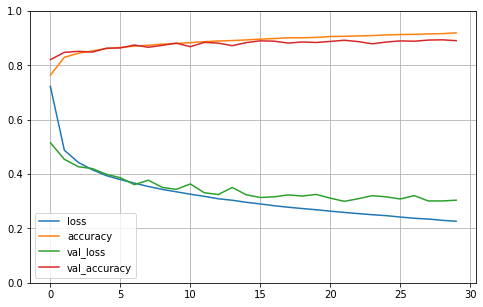

In [63]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [64]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 74.9720 - accuracy: 0.8324


[74.9720230102539, 0.8324000239372253]

In [65]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [68]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [69]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [70]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

# Building a Regression MLP Using the Sequential API

In [71]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [72]:
housing = fetch_california_housing()

In [75]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)